In [129]:
from fastai.vision.all import *
from PIL import ImageDraw
from PIL.Image import Transpose

In [2]:
data_dir = Path.home() / 'data/solar-panel'

In [8]:
panels_path = data_dir / "panelsScreen.csv"
panels_df = pd.read_csv(panels_path, names=['img', 'panel', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'x3', 'y3', 'z3', 'x4', 'y4', 'z4'])

In [98]:
image_files = get_image_files(data_dir/'images')

In [99]:
# keep only the rows that have images
images_idxs = [int(o.stem.split('_')[-1]) for o in image_files]
# faults_df = faults_df.loc[faults_df['img'].isin(images_idxs)]
panels_df = panels_df.loc[panels_df['img'].isin(images_idxs)]

In [100]:
panels_df.head()

,img,panel,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4
4,1,0,1448.7830,302.3929,4.848379,1344.1570,565.2280,5.829680,1173.2190,304.6540,4.866513,1115.1590,566.2947,5.847815
5,1,1,1120.1490,307.8406,4.885396,1071.1520,568.1060,5.866697,847.8801,310.0645,4.903530,844.4354,569.1571,5.884832
6,1,2,790.6816,309.4182,4.865339,796.8146,570.3117,5.846640,518.5185,311.6453,4.883473,570.1711,571.3596,5.864774
7,1,3,469.0962,312.0494,4.886778,528.9846,571.5497,5.868079,199.3117,314.2570,4.904912,303.9917,572.5899,5.886213
8,2,0,1448.7830,302.3929,4.848379,1344.1570,565.2280,5.829680,1173.2190,304.6540,4.866513,1115.1590,566.2947,5.847815


In [154]:
grouped = panels_df.groupby('img')

In [167]:
for name, group in grouped:
    mask = np.zeros((908, 1614))
    mask = Image.fromarray(mask, mode="L")
    draw = ImageDraw.Draw(mask)

    for i, row in group.iterrows():
        points = [
            (row.x1, row.y1),
            (row.x2, row.y2),
            (row.x4, row.y4),
            (row.x3, row.y3),
        ]
        draw.polygon(points, fill=255)

    mask = mask.transpose(Transpose.FLIP_TOP_BOTTOM)
    
    if name==202:
        break

In [168]:
image_file = data_dir / 'images' / f"screen_{int(row.img)}.png"
image = PILImage.create(image_file)

In [169]:
mask = PILMask(mask)

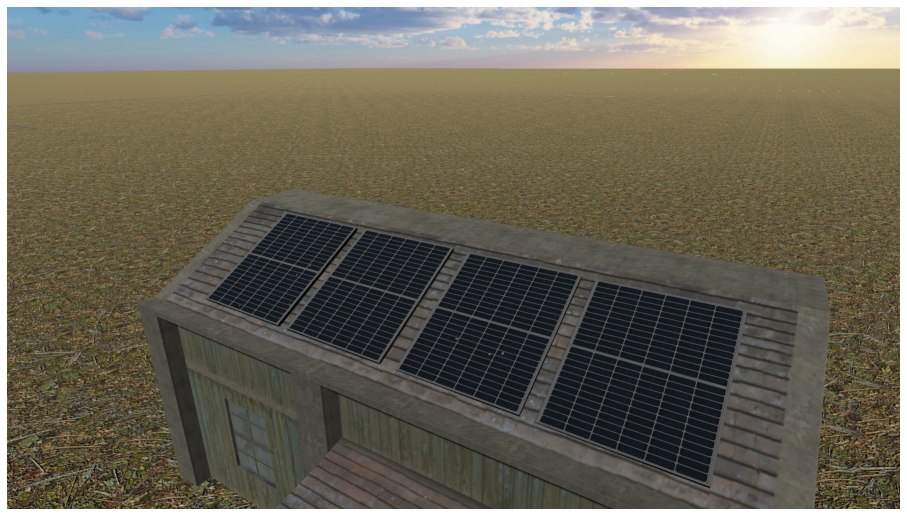

In [171]:
ctx = image.show(figsize=(16, 12))
# ctx = mask.show(ctx=ctx)

In [150]:
np.unique(np.array(mask))

array([  0, 255], dtype=uint8)